In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# Loading train and test data

train1 = pd.read_csv("../Dataset/train.csv") 
test1 = pd.read_csv("../Dataset/test.csv") 

In [3]:
# Checking number of rows and columns

print(train1.shape)
print(test1.shape)

(76020, 371)
(75818, 370)


In [4]:
# Analysing some basic Statistics

train1.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# Checking NAN values

print(train1.isnull().values.sum())
print(test1.isnull().values.sum())

0
0


In [6]:
#Checking data balance according to target variable

Positive = train1[train1["TARGET"] == 1]
Positive.shape

(3008, 371)

In [7]:
Negative = train1[train1["TARGET"] == 0]
Negative.shape

(73012, 371)

In [8]:
train2 = train1[train1["TARGET"] == 0].sample(3008).append(train1[train1["TARGET"] == 1])

In [9]:
train2.shape

(6016, 371)

In [10]:
# Removing variables that represents the same

train_corr = train2.corr(method = 'pearson')
train_corr = np.array(train_corr.fillna(0))
aux = []

for i in range(len(train2.columns)-1):
    for j in range(i+1, len(train_corr)-1):
            if abs(train_corr[i][j]) > 0.90 and j not in aux:
                aux.append(j)
len(aux)

145

In [11]:
train3 = train2.drop(train2.columns[aux], axis = 1)

In [12]:
train3 = train3.drop("ID",1)

In [68]:
# Removing columns with correlation lower than 0.13 to the target variable

train_corr = train3.corr(method = 'pearson')["TARGET"]
train_corr = train_corr.fillna(0)
train4 = train3

i = len(train_corr) - 2

while i >= 0:
    if abs(train_corr[i]) < 0.13:
        train4 = train4.drop(train_corr.index[i],1)
    i -= 1

In [69]:
train4

,var15,ind_var5,ind_var30,num_var4,var36,TARGET
28145,23,0,0,0,99,0
51873,23,0,0,0,99,0
5980,32,1,1,1,3,0
10802,23,0,0,0,99,0
15972,25,0,0,0,99,0
...,...,...,...,...,...,...
75902,30,0,0,0,99,1
75917,27,1,1,2,1,1
75941,26,0,0,0,99,1
76000,75,1,1,1,1,1


In [70]:
abs(train4.corr(method = 'pearson')["TARGET"]).sort_values()

num_var4     0.178074
var36        0.254983
var15        0.271740
ind_var5     0.325551
ind_var30    0.338112
TARGET       1.000000
Name: TARGET, dtype: float64

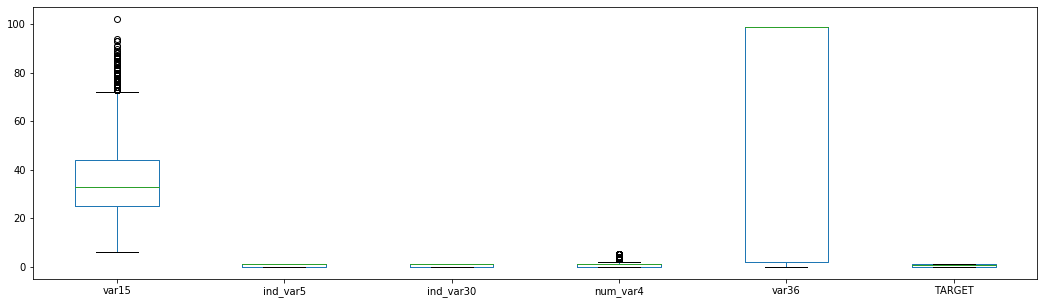

In [58]:
train4.boxplot(grid = False, figsize = (18,5))

In [59]:
# Removing outliers

train5 = train4[(np.abs(stats.zscore(train4)) < 3).all(axis=1)]

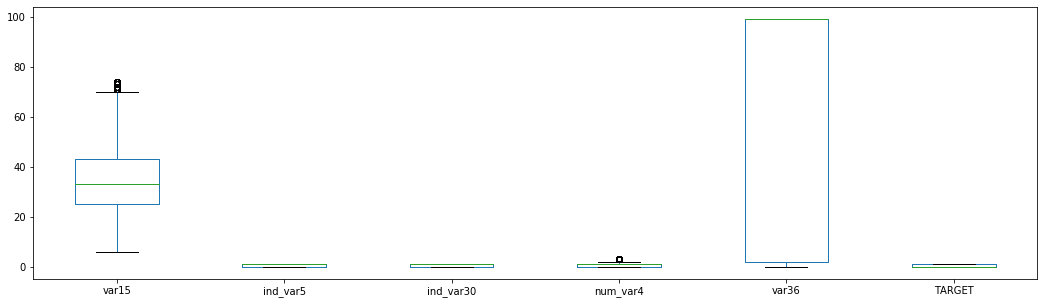

In [60]:
train5.boxplot(grid = False, figsize = (18,5))

In [ ]:
sns.pairplot(train5, hue="TARGET", diag_kind = 'hist')

In [ ]:
def get_level(x):
    if x > 20 and x < 25:
        y = 1
    else: y = 0
    return y

In [ ]:
train6 = train5

In [ ]:
train6["var15_2"] = train6["var15"].apply(get_level)

In [ ]:
sns.pairplot(train6, hue="TARGET", diag_kind = 'hist')

In [ ]:
# Normalizing Data

scaler = MinMaxScaler(feature_range = (0, 1))
train7 = pd.DataFrame(scaler.fit_transform(train6), columns=train6.columns)

In [ ]:
sns.pairplot(train7, hue="TARGET", diag_kind = 'hist')

(6016, 10)


0         0.115678
1        -0.102523
TARGET    1.000000
Name: TARGET, dtype: float64

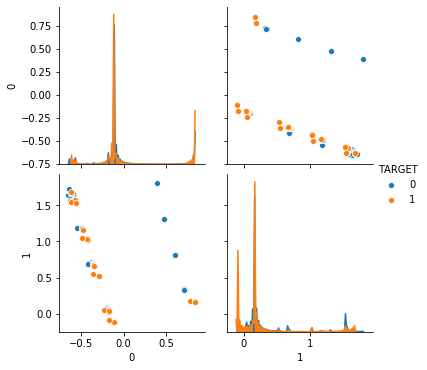

In [62]:
# Removing columns with correlation higher than 0.13 to the target variable

train_corr = train3.corr(method = 'pearson')["TARGET"]
train_corr = train_corr.fillna(0)
trainPCA = train3

i = len(train_corr) - 2

while i >= 0:
    if (abs(train_corr[i]) < 0.08) or (abs(train_corr[i]) > 0.13):
        trainPCA = trainPCA.drop(train_corr.index[i],1)
    i -= 1
trainPCA = trainPCA.drop("TARGET",1)

print(trainPCA.shape)

# Normalizing Data

scaler = MinMaxScaler(feature_range = (0, 1))
trainPCA = pd.DataFrame(scaler.fit_transform(trainPCA), columns=trainPCA.columns)

# Applying PCA

pca = PCA(n_components=2)
trainPCA = pd.DataFrame(pca.fit_transform(trainPCA))
trainPCA["TARGET"] = train3["TARGET"].values



sns.pairplot(trainPCA, hue="TARGET")
trainPCA.corr(method = 'pearson')["TARGET"]

In [64]:
trainPCA[0]

0      -0.115321
1      -0.115321
2      -0.115321
3       0.845456
4      -0.115321
          ...   
6011   -0.115321
6012   -0.115322
6013   -0.115321
6014   -0.115324
6015   -0.179389
Name: 0, Length: 6016, dtype: float64